In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_before = pd.read_csv('file_name.csv')
df_after = df_before.copy()


In [61]:
df_before.shape
df_after.shape

(239, 14)

In [62]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


In [63]:
df_after.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


In [64]:
null_counts = df_after.isnull().sum()
print(null_counts)
print(null_counts.sum())

Country                0
Total Cases            0
New Cases            227
Total Deaths           5
New Deaths           232
Total Recovered       49
New Recovered        222
Active Cases          48
Serious, Critical    179
Tot Cases/1M pop       9
Deaths/1M pop         14
Total Tests           26
Tests/1M pop          26
Population            10
dtype: int64
1047


In [65]:
columns_to_drop = ['New Cases', 'New Deaths', 'New Recovered', 'Serious, Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop']

df_after.drop(columns_to_drop, axis=1, inplace=True)

df_after

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,"111,367,209","1,199,031","109,053,249","1,114,929","1,186,742,917","334,805,269"
1,India,"45,028,429","533,475",NaN,NaN,"935,879,495","1,406,631,776"
2,France,"40,138,560","167,642","39,970,918",0,"271,490,188","65,584,518"
3,Germany,"38,819,284","182,439","38,240,600","396,245","122,332,384","83,883,596"
4,Brazil,"38,407,327","709,765","36,249,161","1,448,401","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
234,Total:,"69,791,773","1,365,551","66,648,277","1,777,945",NaN,NaN
235,Total:,"14,826,780","32,665","14,572,565","221,550",NaN,NaN
236,Total:,"12,859,770","258,884","12,089,899","510,987",NaN,NaN
237,Total:,721,15,706,0,NaN,NaN


In [66]:
new_null= df_after.isnull().sum()
print("Before")
print(df_before.isnull().sum())
print("--------------------------------")
print("After")
print(new_null)


Before
Country                0
Total Cases            0
New Cases            227
Total Deaths           5
New Deaths           232
Total Recovered       49
New Recovered        222
Active Cases          48
Serious, Critical    179
Tot Cases/1M pop       9
Deaths/1M pop         14
Total Tests           26
Tests/1M pop          26
Population            10
dtype: int64
--------------------------------
After
Country             0
Total Cases         0
Total Deaths        5
Total Recovered    49
Active Cases       48
Total Tests        26
Population         10
dtype: int64


In [67]:
df_after.drop(df_after[(df_after.Country == 'Total:')].index, inplace=True)
df_after.info()
df_after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     226 non-null    object
 3   Total Recovered  182 non-null    object
 4   Active Cases     183 non-null    object
 5   Total Tests      213 non-null    object
 6   Population       229 non-null    object
dtypes: object(7)
memory usage: 12.8+ KB


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,"111,367,209","1,199,031","109,053,249","1,114,929","1,186,742,917","334,805,269"
1,India,"45,028,429","533,475",NaN,NaN,"935,879,495","1,406,631,776"
2,France,"40,138,560","167,642","39,970,918",0,"271,490,188","65,584,518"
3,Germany,"38,819,284","182,439","38,240,600","396,245","122,332,384","83,883,596"
4,Brazil,"38,407,327","709,765","36,249,161","1,448,401","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,NaN,80,NaN,"1,378"
227,Vatican City,29,NaN,29,0,NaN,799
228,Western Sahara,10,1,9,0,NaN,"626,161"
229,MS Zaandam,9,2,7,0,NaN,NaN


In [68]:
# Convert columns to integer type
df_after['Total Cases'] = df_after['Total Cases'].str.replace(',', '').astype(float)
df_after['Total Deaths'] = df_after['Total Deaths'].str.replace(',', '').fillna(0).astype(int)
df_after['Total Recovered'] = df_after['Total Recovered'].str.replace(',', '').fillna(0).astype(int)
df_after['Active Cases'] = df_after['Active Cases'].str.replace(',', '').fillna(0).astype(int)
df_after['Total Tests'] = df_after['Total Tests'].str.replace(',', '').fillna(0).astype(int)
df_after['Population'] = df_after['Population'].str.replace(',', '').fillna(0).astype(int)

# Calculate mean excluding zeros
total_deaths_mean = df_after[df_after['Total Deaths'] != 0]['Total Deaths'].mean()
total_recovered_mean = df_after[df_after['Total Recovered'] != 0]['Total Recovered'].mean()
active_cases_mean = df_after[df_after['Active Cases'] != 0]['Active Cases'].mean()
total_tests_mean = df_after[df_after['Total Tests'] != 0]['Total Tests'].mean()
population_mean = df_after[df_after['Population'] != 0]['Population'].mean()

# Fill missing values with the calculated mean
df_after['Total Deaths'].replace(0, total_deaths_mean, inplace=True)
df_after['Total Recovered'].replace(0, total_recovered_mean, inplace=True)
df_after['Active Cases'].replace(0, active_cases_mean, inplace=True)
df_after['Total Tests'].replace(0, total_tests_mean, inplace=True)
df_after['Population'].replace(0, population_mean, inplace=True)


In [69]:
df_after.info()
print(df_after.isnull().sum())
df_after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total Cases      231 non-null    float64
 2   Total Deaths     231 non-null    float64
 3   Total Recovered  231 non-null    float64
 4   Active Cases     231 non-null    float64
 5   Total Tests      231 non-null    float64
 6   Population       231 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.8+ KB
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Tests        0
Population         0
dtype: int64


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,111367209.0,1.199031e+06,1.090532e+08,1.114929e+06,1.186743e+09,3.348053e+08
1,India,45028429.0,5.334750e+05,3.008911e+06,3.858802e+04,9.358795e+08,1.406632e+09
2,France,40138560.0,1.676420e+05,3.997092e+07,3.858802e+04,2.714902e+08,6.558452e+07
3,Germany,38819284.0,1.824390e+05,3.824060e+07,3.962450e+05,1.223324e+08,8.388360e+07
4,Brazil,38407327.0,7.097650e+05,3.624916e+07,1.448401e+06,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
226,Tokelau,80.0,3.090710e+04,3.008911e+06,8.000000e+01,3.298122e+07,1.378000e+03
227,Vatican City,29.0,3.090710e+04,2.900000e+01,3.858802e+04,3.298122e+07,7.990000e+02
228,Western Sahara,10.0,1.000000e+00,9.000000e+00,3.858802e+04,3.298122e+07,6.261610e+05
229,MS Zaandam,9.0,2.000000e+00,7.000000e+00,3.858802e+04,3.298122e+07,3.469404e+07


In [70]:
df_before.info()
print(df_before.isnull().sum())
df_before

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB
Country                0
Total Cases            0
New Cases            22

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [71]:
df_after.to_csv("Covid.csv", index=False)

In [72]:
attributes = ['Total Cases', 'Total Deaths', 'Total Recovered']
data_before = df_after[attributes].copy()

In [73]:
# Calculate summary statistics
mean_values = data_before.mean()
std_values = data_before.std()
median_values = data_before.median()
q1_values = data_before.quantile(0.25)
q3_values = data_before.quantile(0.75)

print("Summary Statistics:")
print("Mean:")
print(mean_values)
print("\nStandard Deviation:")
print(std_values)
print("\nMedian:")
print(median_values)
print("\nQ1:")
print(q1_values)
print("\nQ3:")
print(q3_values)

Summary Statistics:
Mean:
Total Cases        3.045589e+06
Total Deaths       3.090710e+04
Total Recovered    3.008911e+06
dtype: float64

Standard Deviation:
Total Cases        9.992410e+06
Total Deaths       1.081134e+05
Total Recovered    9.052004e+06
dtype: float64

Median:
Total Cases        206897.0
Total Deaths         2349.0
Total Recovered    655852.0
dtype: float64

Q1:
Total Cases        26069.5
Total Deaths         225.0
Total Recovered    38511.0
Name: 0.25, dtype: float64

Q3:
Total Cases        1.347862e+06
Total Deaths       1.701450e+04
Total Recovered    3.008911e+06
Name: 0.75, dtype: float64


In [74]:
# Calculate IQR for each column
iqr_values = q3_values - q1_values
print("\nInterquartile Range (IQR):")
print(iqr_values)


Interquartile Range (IQR):
Total Cases        1.321792e+06
Total Deaths       1.678950e+04
Total Recovered    2.970400e+06
dtype: float64


In [75]:
# Define lower and upper bounds for outliers
lower_bounds = q1_values - 1.5 * iqr_values
upper_bounds = q3_values + 1.5 * iqr_values

print("\nLower Bounds for Outliers:")
print(lower_bounds)
print("\nUpper Bounds for Outliers:")
print(upper_bounds)


Lower Bounds for Outliers:
Total Cases       -1.956618e+06
Total Deaths      -2.495925e+04
Total Recovered   -4.417089e+06
dtype: float64

Upper Bounds for Outliers:
Total Cases        3.330550e+06
Total Deaths       4.219875e+04
Total Recovered    7.464510e+06
dtype: float64


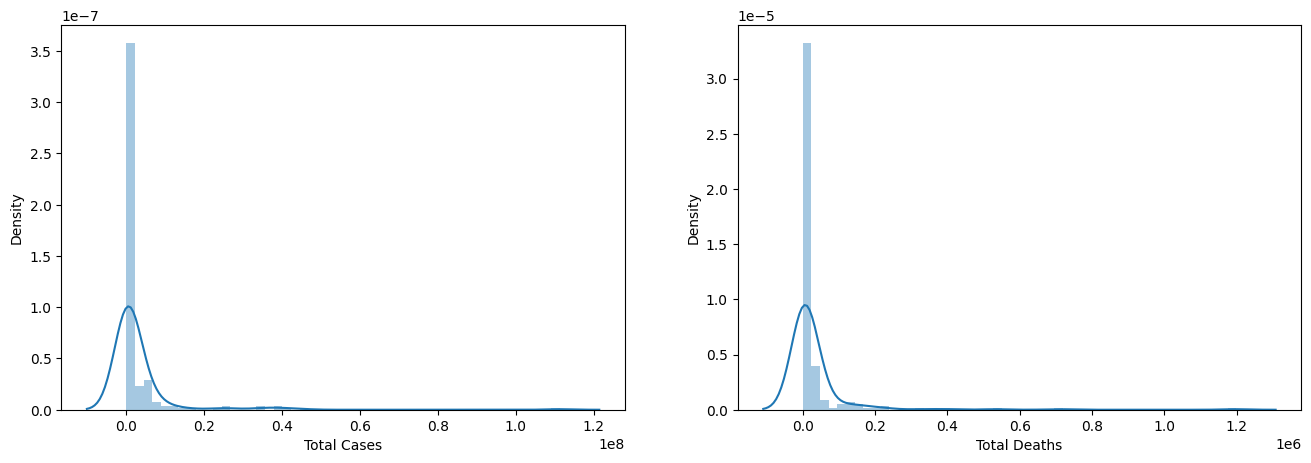

In [76]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_after['Total Cases'])
plt.subplot(1,2,2)
sns.distplot(df_after['Total Deaths'])
plt.show()

In [77]:
print("Highest allowed",df_after['Total Cases'].mean() + 3*df_after['Total Cases'].std())
print("Lowest allowed",df_after['Total Cases'].mean() - 3*df_after['Total Cases'].std())

Highest allowed 33022817.811641317
Lowest allowed -26931639.214238722


In [78]:
df_after[(df_after['Total Cases'] > 33022817.8) | (df_after['Total Cases'] < -26931639.2)]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,111367209.0,1199031.0,1.090532e+08,1.114929e+06,1.186743e+09,3.348053e+08
1,India,45028429.0,533475.0,3.008911e+06,3.858802e+04,9.358795e+08,1.406632e+09
2,France,40138560.0,167642.0,3.997092e+07,3.858802e+04,2.714902e+08,6.558452e+07
3,Germany,38819284.0,182439.0,3.824060e+07,3.962450e+05,1.223324e+08,8.388360e+07
4,Brazil,38407327.0,709765.0,3.624916e+07,1.448401e+06,6.377617e+07,2.153536e+08
5,S. Korea,34571873.0,35934.0,3.453594e+07,3.858802e+04,1.580406e+07,5.132990e+07
6,Japan,33803572.0,74694.0,3.008911e+06,3.858802e+04,1.004149e+08,1.255848e+08


In [79]:
after_data = df_after[(df_after['Total Cases'] < 33022817.8) & (df_after['Total Cases'] > -26931639.2)]
after_data

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
7,Italy,26716804.0,196257.000000,2.634786e+07,172684.000000,2.802381e+08,6.026277e+07
8,UK,24898914.0,232112.000000,2.465517e+07,11632.000000,5.225265e+08,6.849791e+07
9,Russia,23957146.0,402264.000000,2.337078e+07,184103.000000,2.734000e+08,1.458059e+08
10,Turkey,17232066.0,102174.000000,3.008911e+06,38588.018987,1.627434e+08,8.556198e+07
11,Spain,13914811.0,121760.000000,1.376242e+07,30634.000000,4.710363e+08,4.671914e+07
...,...,...,...,...,...,...,...
226,Tokelau,80.0,30907.097345,3.008911e+06,80.000000,3.298122e+07,1.378000e+03
227,Vatican City,29.0,30907.097345,2.900000e+01,38588.018987,3.298122e+07,7.990000e+02
228,Western Sahara,10.0,1.000000,9.000000e+00,38588.018987,3.298122e+07,6.261610e+05
229,MS Zaandam,9.0,2.000000,7.000000e+00,38588.018987,3.298122e+07,3.469404e+07


In [80]:
upper_limit = df_after['Total Cases'].mean() + 3*df_after['Total Cases'].std()
lower_limit = df_after['Total Cases'].mean() - 3*df_after['Total Cases'].std()

In [81]:
df_after['Total Cases'] = np.where(
    df_after['Total Cases']>upper_limit,
    upper_limit,
    np.where(
        df_after['Total Cases']<lower_limit,
        lower_limit,
        df_after['Total Cases']
    )
)

In [82]:
df_after['Total Cases'].describe()

count    2.310000e+02
mean     2.565171e+06
std      6.547496e+06
min      9.000000e+00
25%      2.606950e+04
50%      2.068970e+05
75%      1.347862e+06
max      3.302282e+07
Name: Total Cases, dtype: float64

<Axes: xlabel='Total Deaths'>

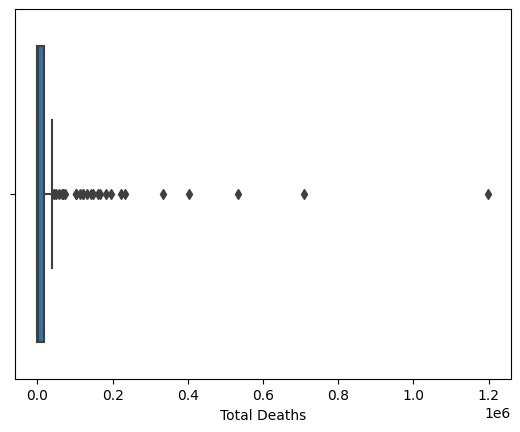

In [83]:
sns.boxplot(df_after['Total Deaths'])

In [84]:
q1 = df_after['Total Deaths'].quantile(0.25)
q3 = df_after['Total Deaths'].quantile(0.75)

iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
print(ul)
print(ll)

42198.75
-24959.25


In [85]:
df_after[df_after['Total Deaths'] > ul]
df_after[df_after['Total Deaths'] < ll]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population


In [86]:
new_df = df_after[df_after['Total Deaths'] < ul]
new_df.shape

(204, 7)

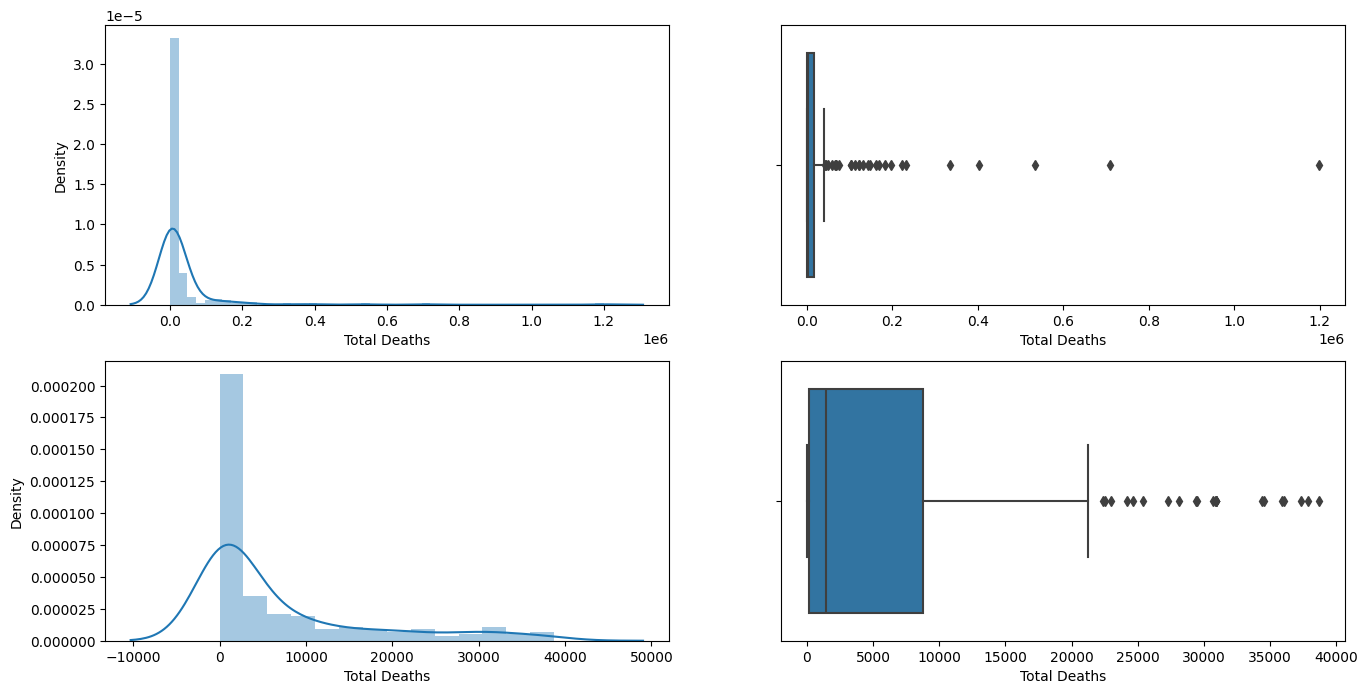

In [87]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_after['Total Deaths'])
plt.subplot(2,2,2)
sns.boxplot(df_after['Total Deaths'])
plt.subplot(2,2,3)
sns.distplot(new_df['Total Deaths'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Total Deaths'])
plt.show()

In [88]:
new_df_cap = df_after.copy()
new_df_cap['Total Deaths'] = np.where(
    new_df_cap['Total Deaths'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Total Deaths'] < lower_limit,
        lower_limit,
        new_df_cap['Total Deaths']
    )
)

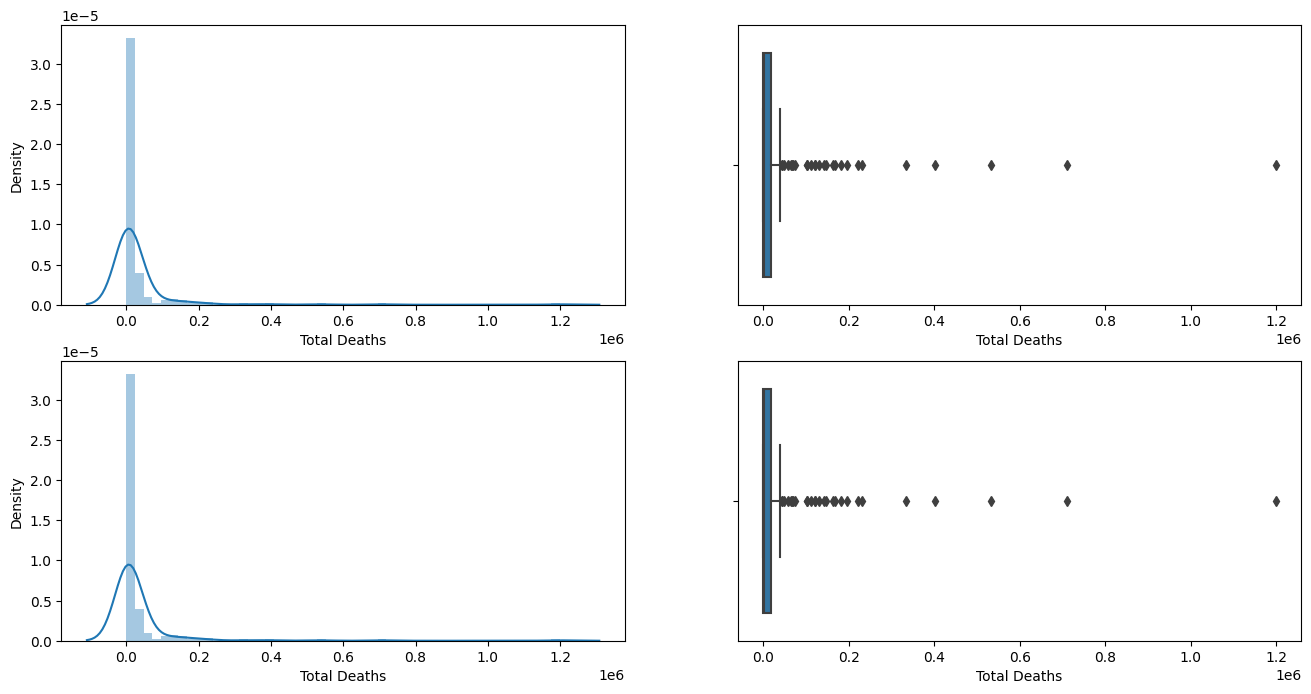

In [89]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_after['Total Deaths'])
plt.subplot(2,2,2)
sns.boxplot(df_after['Total Deaths'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Total Deaths'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Total Deaths'])
plt.show()

In [90]:
df_after


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,3.302282e+07,1.199031e+06,1.090532e+08,1.114929e+06,1.186743e+09,3.348053e+08
1,India,3.302282e+07,5.334750e+05,3.008911e+06,3.858802e+04,9.358795e+08,1.406632e+09
2,France,3.302282e+07,1.676420e+05,3.997092e+07,3.858802e+04,2.714902e+08,6.558452e+07
3,Germany,3.302282e+07,1.824390e+05,3.824060e+07,3.962450e+05,1.223324e+08,8.388360e+07
4,Brazil,3.302282e+07,7.097650e+05,3.624916e+07,1.448401e+06,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
226,Tokelau,8.000000e+01,3.090710e+04,3.008911e+06,8.000000e+01,3.298122e+07,1.378000e+03
227,Vatican City,2.900000e+01,3.090710e+04,2.900000e+01,3.858802e+04,3.298122e+07,7.990000e+02
228,Western Sahara,1.000000e+01,1.000000e+00,9.000000e+00,3.858802e+04,3.298122e+07,6.261610e+05
229,MS Zaandam,9.000000e+00,2.000000e+00,7.000000e+00,3.858802e+04,3.298122e+07,3.469404e+07


In [91]:
sorted = df_after.sort_values(by=['Country'])
display(sorted)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
110,Afghanistan,231625.0,7984.0,2.099900e+05,13651.000000,1.359910e+06,40754388.0
102,Albania,334863.0,3605.0,3.302330e+05,1025.000000,1.941032e+06,2866374.0
105,Algeria,272010.0,6881.0,1.830610e+05,82068.000000,2.309600e+05,45350148.0
151,Andorra,48015.0,165.0,3.008911e+06,38588.018987,2.498380e+05,77463.0
128,Angola,107322.0,1937.0,1.034190e+05,1966.000000,1.499795e+06,35027343.0
...,...,...,...,...,...,...,...
218,Wallis and Futuna,3550.0,8.0,4.380000e+02,3104.000000,2.050800e+04,10982.0
228,Western Sahara,10.0,1.0,9.000000e+00,38588.018987,3.298122e+07,626161.0
196,Yemen,11945.0,2159.0,9.124000e+03,662.000000,3.295920e+05,31154867.0
99,Zambia,349304.0,4069.0,3.413160e+05,3919.000000,4.112961e+06,19470234.0


In [92]:
display(df_after.duplicated())
dups_removed = df_after.drop_duplicates()
display(dups_removed)

0      False
1      False
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Length: 231, dtype: bool

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,3.302282e+07,1.199031e+06,1.090532e+08,1.114929e+06,1.186743e+09,3.348053e+08
1,India,3.302282e+07,5.334750e+05,3.008911e+06,3.858802e+04,9.358795e+08,1.406632e+09
2,France,3.302282e+07,1.676420e+05,3.997092e+07,3.858802e+04,2.714902e+08,6.558452e+07
3,Germany,3.302282e+07,1.824390e+05,3.824060e+07,3.962450e+05,1.223324e+08,8.388360e+07
4,Brazil,3.302282e+07,7.097650e+05,3.624916e+07,1.448401e+06,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
226,Tokelau,8.000000e+01,3.090710e+04,3.008911e+06,8.000000e+01,3.298122e+07,1.378000e+03
227,Vatican City,2.900000e+01,3.090710e+04,2.900000e+01,3.858802e+04,3.298122e+07,7.990000e+02
228,Western Sahara,1.000000e+01,1.000000e+00,9.000000e+00,3.858802e+04,3.298122e+07,6.261610e+05
229,MS Zaandam,9.000000e+00,2.000000e+00,7.000000e+00,3.858802e+04,3.298122e+07,3.469404e+07


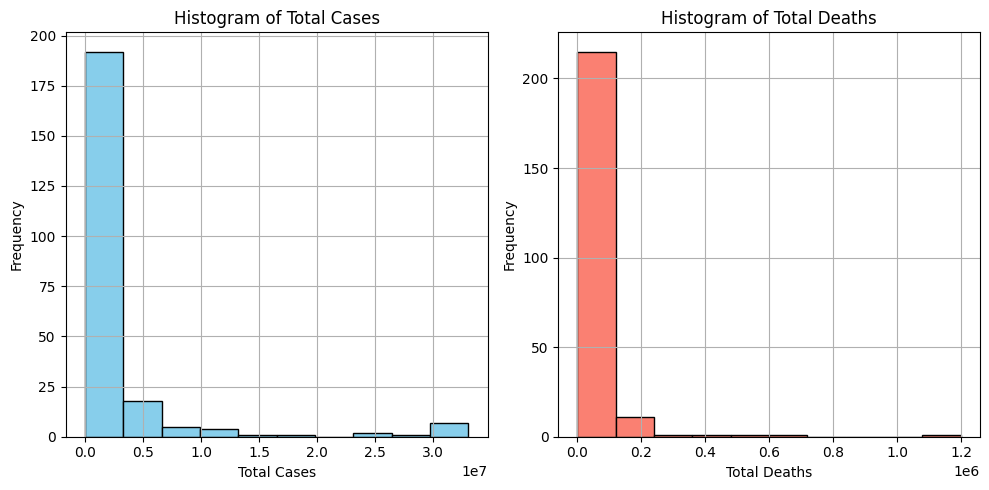

In [93]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df_after['Total Cases'].hist(color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_after['Total Deaths'].hist(color='salmon', edgecolor='black')
plt.title('Histogram of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


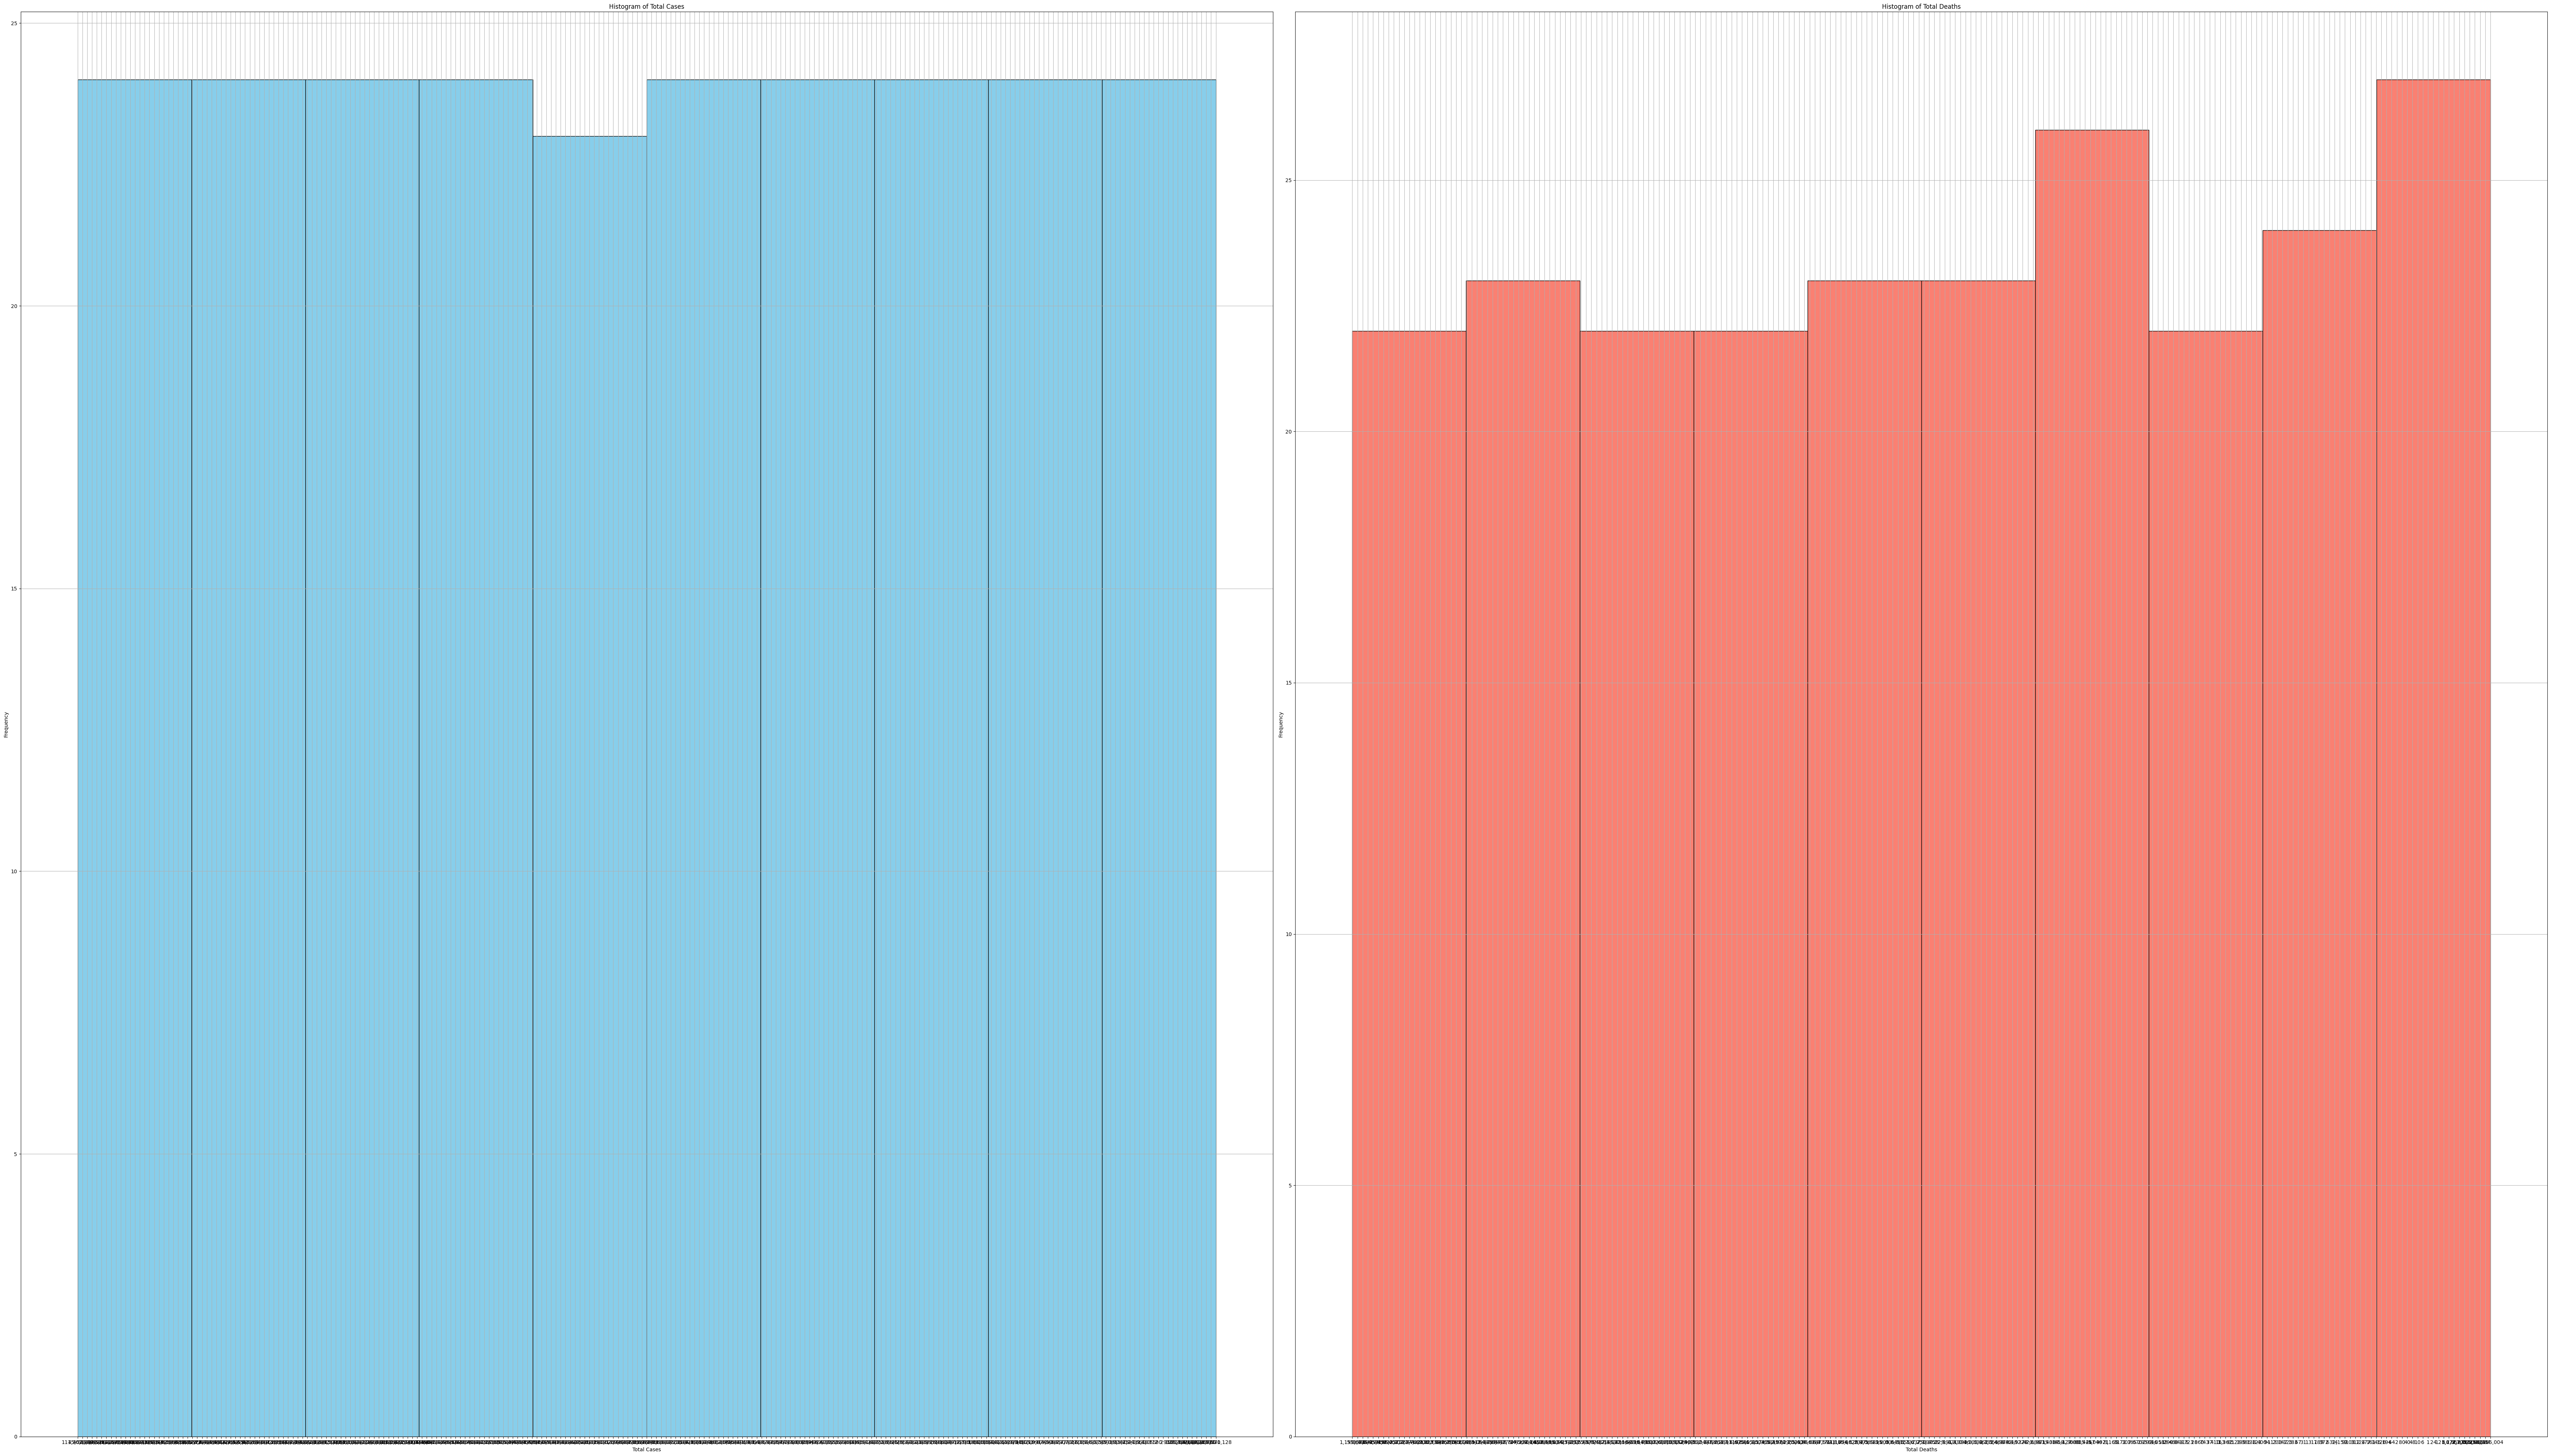

In [94]:
import matplotlib.pyplot as plt

# Plot histograms for 'Total Cases' and 'Total Deaths'
plt.figure(figsize=(70, 40))

plt.subplot(1, 2, 1)
df_before['Total Cases'].hist(color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_before['Total Deaths'].hist(color='salmon', edgecolor='black')
plt.title('Histogram of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


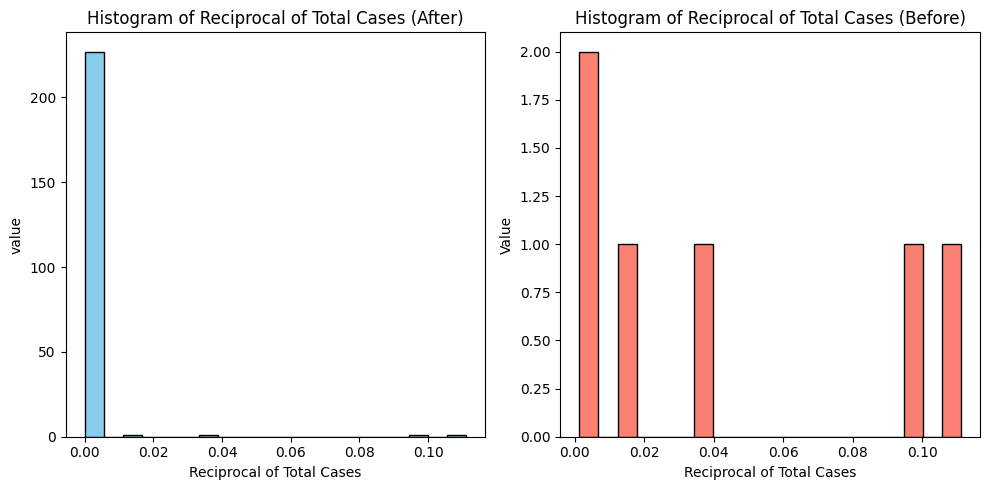

In [95]:
df_after['Total Cases'] = pd.to_numeric(df_after['Total Cases'], errors='coerce')
df_before['Total Cases'] = pd.to_numeric(df_before['Total Cases'], errors='coerce')

Inv_after = 1 / df_after['Total Cases']
Inv_before = 1 / df_before['Total Cases']

# Plot histograms of the transformed variable for both dataframes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(Inv_after, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Reciprocal of Total Cases (After)')
plt.xlabel('Reciprocal of Total Cases')
plt.ylabel('value')

plt.subplot(1, 2, 2)
plt.hist(Inv_before, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Reciprocal of Total Cases (Before)')
plt.xlabel('Reciprocal of Total Cases')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
